# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
This is a **classification** problem because we are interested in predicting a categorical outcome (specically, whether or not each student needs an intervention).

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [78]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [79]:
# Calculate number of students
n_students = student_data.shape[0]

# Calculate number of features
n_features = student_data.shape[1]-1

# Calculate passing students
n_passed = sum(student_data['passed'] == 'yes')

# Calculate failing students
n_failed = sum(student_data['passed'] == 'no')

# Calculate graduation rate
grad_rate = 100.00*n_passed/(n_passed+n_failed)

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [80]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [81]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [82]:
# Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = n_students - num_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, train_size=num_train, random_state=273)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

**1. Random Forests**
- *Describe one real-world application in industry where the model can be applied.*
     - As discussed by Gerlanc (2012), random forests have been applied to predicting when a customer is likely to be converted. The resulting predictions from the random forest model were used to determine whether particular potential customers should be targeted with an ad campaign. 

- *What are the strengths of the model; when does it perform well?*
    - While individual decision trees are quite prone to overfitting and often do not use all available features, random forests address these issues by growing many distinct decisions trees which are fit using different (boostrapped) samples and rely on different subsets of the features (Random Forest, 2016; sklearn Developers, 2014). This reduces the tendency to overfit and ensures that data from many features will be encorporated. 
    - In addition, like decision trees, Random Forests are invariant to many feature properties (e.g. scale, feature types, transformations) and can handle data that are non-linearly separable and/or contain irregular patterns (Random Forest, 2016). Some other algorithms would require rescaling and identifying/transforming features with non-linear relationships, but here that should not be a concern. 
    - The result of the above advantages of the random forest algorithm is that this is generally regarded to be a robust algorithm that should perform reasonably well whenever sufficient data is available to predict the outcome (sklearn Developers, 2014). 

- *What are the weaknesses of the model; when does it perform poorly?*
    - The randomization process used to keep the variance of decision trees low, has the side effect of leading to slightly higher bias relative to individual decision trees (Random Forest, 2016). This may negatively impact generalization. 
    - In addition, this algorithm is more computationally intensive than some other possibilities because it involves a resampling procedure and fitting many decision trees rather than just one. This may be an issue for our current problem because we need to select a reasonably efficient algorithm. 
    - Although random forests should be robust to many potentially problematic data properties, like any machine learning algorithm they would perform poorly if they were provided with insufficient data to model the outcome. E.g. if the observations cannot be regarded as random and independent, if the sample size is insufficient, if important features are missing, etc. In these cases, the models produced may not generalize to new observations and the model may not be able to make accurate predictions.
    
- *What makes this model a good candidate for the problem, given what you know about the data?*
    - Random forests, like decision trees, do well with features of mixed data types and scales, which may be useful here because our dataset contains many dummy coded variables alongside variables like "number of absenses" that can take on a much wider range of values. Some algorithms might require normalization steps in order to perform well, but because Random Forests are ensembles of decision trees that should not be an issue for this algorithm. 
    - Unlike individual decision trees, Random Forests tend to be more resistent to overfitting. Although there may be slightly higher bias using random forests relative to decision trees, I expect that the reduction in variance will lead to a substantial reduction in generalization error. 

**2. Support Vector Machine**
- *Describe one real-world application in industry where the model can be applied.*
    - Support Vector Machines (SVMs) have been used to predict when drivers will change lanes (Kumar, Perrollaz, & Lefevre, Laugier, 2013). This can be used by "Advanced Driver Assistance Systems", which can provide warnings to drivers or take actions to minimize accident risk. 

- *What are the strengths of the model; when does it perform well?*
    - Because SVMs try to find a line that separates the classes with the largest possible margin, this algorithm can have quite high classification accuracy for new observations.
    - In addition, SVMs use the "kernel trick", which can allow us to model data that are not linearly separable. 
    - Finally, SVMs use regularization which may reduce overfitting, which could lead to better performance on novel data. 
    
- *What are the weaknesses of the model; when does it perform poorly?*
    - In spite of regularization, SVMs are still quite prone to overfitting and can be sensitive to noise and outliers. When there is a lot of noise, SVMs may perform poorly and be slow to fit. Also, SVMs will prioritize correct classification over simplicity which may lead to sub-optimal models when outliers are present. 
    - In addition, training an SVM is relatively computationally intensive, so if the data set is very large, SVMs may run slowly and may be difficult to fit. 

- *What makes this model a good candidate for the problem, given what you know about the data?*
     - This algorithm may be a good candidate because it often performs well on similar classificaiton problems. Its ability to use the 'kernel trick' to handle non-linear relationships may also be helpful. 
     - Since the dataset is small, the SVM is unlikely to be lead to be excessively expensive from a computational perspective, but this will need to be evaluated in the experiments below. 


**3. k-Nearest Neighbors**
- *Describe one real-world application in industry where the model can be applied.*
    - The k-Nearest Neighbors (k-NN) algorithm can be useful for identifying suggested content in recommender systems. For example, at least one of the proposed solutions to the Neflix Prize a few years ago used k-NN (in combination with other machine learning techniques) to recommend new movies to users given how they had previously rated other movies (Kulkarni, n.d.). 

- *What are the strengths of the model; when does it perform well?*
     - Like the random forest algorithm described above, k-NN will does not require explicit modeling of non-linear relationships and can handle irregular patterns. Ihis is because it relies on local approximations to make predictions (Bejar, 2013).
     - Since kNN is a form of instance-based learning, it does not require extensive resources to train. (Computations are pushed to the prediction phase.)
     - The algorithm is simple and has intuitive appeal. E.g. it makes sense to suggest that students that are most similar to those that have failed might have the highest risk of failing themselves. 
     
- *What are the weaknesses of the model; when does it perform poorly?*
    - Unfortunately, the k-NN algorithm will be particularly sensitive to high dimensionality because as more predictors are included, it becomes more difficult to make meaningful distinctions between points based on the Euclidean distances (k-Nearest Neighbors Algorithm, 2016) because all points may appear very far away in a high dimensional space (Bejar, 2013). 
    - In addition, kNN may not perform well when weak or irrelevant predictors are included (Bejar, 2013; k-Nearest Neighbors Algorithm, 2016). This is because the algorithm uses all predictors to determine distance, so it is possible for observations to appear close together based on poor predictors, but have very different outcome scores. 
    - Also, if the features have different scales, feature scaling may be required to obtain reasonable predictions. The k-NN algorithm essentially interprets differences in magnitude as differences in importance, which could lead to poor model performance (k-Nearest Neighbors Algorithm, 2016). 
    - In very large samples, generating predictions can be computationally expensive. 
    - If an inappropriate value for the parameter k is selected, performance can be negatively impacted. 
    
- *What makes this model a good candidate for the problem, given what you know about the data?*
    - I think that the logic of the kNN algorithm is well suited to this problem. That is, we have a number of features, we don't know exactly what kind of relationship the features will have with the outcome, but we do (intuitively) have reason to believe that students that have a high risk of failing will tend to be similar to students that have failed in the past on these particular features. The kNN algorithm's primary strength is that it relies on similar observations to make inferences locally and does not require us to guess at the overall relationship between each feature and the outcome (e.g. like we would need to do in logistic regression to model non-linear trends). 
    - In addition, I think that for this dataset, the k-NN algorithm may be more efficient than some of the other options because it does not require many resources to train (beyond data storage) and since the dataset is not particularly large, the prediction task should not be particularly expensive. 



** References **

> Gerlanc, D. (2012). Predicting Customer Conversion with Random Forests [LinkedIn SlideShare]. Retrieved from 
http://www.slideshare.net/dgerlanc/predicting-customer-conversion-with-random-forests

> Bejar, J. (2013). K-nearest neighbors [PDF Document]. Retrieved from http://www.cs.upc.edu/~bejar/apren/docum/trans/03d-algind-knn-eng.pdf

> Jurafsky, D. (n.d.). Text Classification and Naive Bayes [PDF Document]. Retrieved on August 7, 2016 from https://web.stanford.edu/class/cs124/lec/naivebayes.pdf

> Kulkarni, A. S. (n.d.). A Nearest Neighbor Approach Using Clustering on the Netflix Prize Data [PDF Document]. Retrieved on August 6, 2016 from http://www.d.umn.edu/~kulka053/Presentation_full.pdf

> Kumar, P., Perrollaz, M., Lefevre, S., Laugier, C. (2013). Proceedings from IEEE Intelligent Vehicles Symposium, June 2013: Learning-based approach for online lane change intention prediction. Gold Coast, Australia.

> Random Forest (2016). Retrieved August 4, 2016 from Wikipedia: https://en.wikipedia.org/wiki/Random_forest

> k-Nearest Neighbors Algorithm (2016). Retrieved August 6, 2016 from Wikipedia: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#Properties

> sklearn Developers (2014). Ensemble Methods [User Guide]. Retrieved on August 4, 2016 from http://scikit-learn.org/stable/modules/ensemble.html#forest


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [83]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [84]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize the three models
clf_A = RandomForestClassifier(random_state=617)
clf_B = SVC(random_state=617)
clf_C = KNeighborsClassifier()

# This was section was included as to-be-editted sample code, 
# but is not necessary with loop below:

# Set up the training set sizes
#X_train_100 = X_train[:100]
#y_train_100 = y_train[:100]
#
#X_train_200 = X_train[:200]
#y_train_200 = y_train[:200]
#
#X_train_300 = X_train
#y_train_300 = y_train

# Execute the 'train_predict' function for each classifier and each training set size
for model in [clf_A, clf_B, clf_C]:
    for N in [100, 200, 300]:
        train_predict(model, X_train[:N], y_train[:N], X_test, y_test)
        print '\n'

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0292 seconds
Made predictions in 0.0013 seconds.
F1 score for training set: 0.9861.
Made predictions in 0.0008 seconds.
F1 score for test set: 0.7681.


Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0252 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9965.
Made predictions in 0.0008 seconds.
F1 score for test set: 0.7704.


Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0249 seconds
Made predictions in 0.0013 seconds.
F1 score for training set: 0.9856.
Made predictions in 0.0009 seconds.
F1 score for test set: 0.7794.


Training a SVC using a training set size of 100. . .
Trained model in 0.0039 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8571.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.7662.


Training a SVC using a training set size of

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Random Forests**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :----------: | :-----------: | :--------------------: | :--------------: | :-------------: |
| 100          |      0.0292   |        0.0008          |    0.9861        |    0.7681       |
| 200          |      0.0252   |        0.0008          |    0.9965        |    0.7704       |
| 300          |      0.0249   |        0.0009          |    0.9856        |    0.7794       |

** Classifer 2 - Support Vector Machines**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------: | :-----------: | :--------------------: | :--------------: | :-------------: |
| 100         |      0.0039   |        0.0006          |    0.8571        |    0.7662       |
| 200         |      0.0026   |        0.0009          |    0.8598        |    0.7712       |
| 300         |      0.0055   |        0.0017          |    0.8655        |    0.8000       |

** Classifer 3 - Nearest Neighbors**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------: | :-----------: | :--------------------: | :--------------: | :-------------: |
| 100         |      0.0035   |        0.0010          |    0.8627        |    0.7519       |
| 200         |      0.0005   |        0.0013          |    0.8608        |    0.7571       |
| 300         |      0.0006   |        0.0018          |    0.8661        |    0.7704       |


## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

Based on these results, the Support Vector Machine seems like the optimal model because of its high performance in terms of making accurate predictions in the test set and moderate resource demands (in this data). The Support Vector Machine tended to produce the highest F1 score relative to the other two models. This indicates better prediction performance in terms of being able to correctly identify most students that would need interventions (recall) and having a high proportion of students identified as at risk actually being at risk (precision). 

For the sample sizes considered here the support vector machine was also quite efficient in terms of training and testing times. The training times for support vector machine were not substantially slower than the nearest neighbors algorithm and were markedly faster than the Random Forest training time. The prediction times for the Support Vector Machine tended to be somewhat faster than and/or comparable to the k-Nearest Neighbors algorithm, but slightly slower than the random forests algorithm. (If the school had reason to expect a dramatic increase in the number of students we would need to reconsider the performance of the algorithms at scale.)

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

***Classification and Prediction Background:*** Each of the facts that we have about the students (e.g. how long they studied, their family size, etc.) can be treated as a dimension. We can imagine looking at these dimensions and finding a boundary (e.g. a line, plane, or multi-dimensional plane) that will separate the students that passed from those that failed. For example, consider the hypothetical data in *Figure 1* below. If we knew each students' study times and how many absences they had we could find a boundary that separated the students that passed (displayed in green) from those that failed (displayed in red). Later we could look at the study time and absences of new students and predict whether they are likely pass or fail based on whether they fall on the side with the students that passed or that with the students that failed. The example in *Figure 1* is clearly overly simple and in reality it will not be so easy or even possible to find a simple linear boundary between the classes and we will need to be precise in our boundary calculation to ensure that our results will generalize to new students. 

***Support Vector Machine Details:*** Support vector machines (SVMs) provide a way to find a boundary that addresses both of the issues mentioned above. First, if the classes cannot be linearly separated, SVMs can use transformations to map the data to a higher dimensional space where the classes can be separated. For example, consider the 2-dimensional data in *Figure 2* below. Although these data cannot be separated with a line in 2-dimensions, we can add a third dimension (computed from the first two) in which the data can be separated with a plane (see *Figure 3* below). Second, the boundary drawn in *Figure 1* is imprecise and comes very close to 2 of the points near (see *Figure 4* below). Since it is so close to these points, it is easy to imagine a new student having one more absence or one more hour of study time and falling on the incorrect side of the boundary. SVMs will minimize this risk by selecting the decision boundary that maximizes the distance between the line/plane and the points closest to it (which are called 'support vectors'). 

#### Acknowledgments
The examples and diagrams included below are based on and/or inspired by those created by Kim (2013) and those in the helpful feedback from the Udacity Reviewers. 

#### Reference 
> Kim, E. (2013). Everything You Wanted to Know about the Kernel Trick (But Were Too Afraid to Ask). Retrieved on September 4, 2016 from http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html

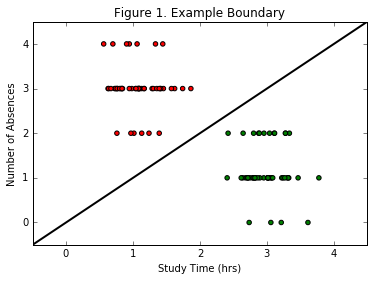

In [8]:
#Look at an example of non-linearly separable data
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

#Generate Example Data
rd.seed(1101)
x1 = []
x2 = []
y  = []
for i in range(0,100):
    y.append(rd.randint(0,1))
    x1.append(rd.gauss(y[i]*2+1,0.3))
    x2.append(round(rd.gauss(3-2*y[i],0.5)))
class_colors=['green' if yi == 1 else 'red' for yi in y]

#Plot Data
plt.scatter(x1,x2,c=class_colors)
plt.axis([-.5, 4.5, -.5, 4.5]) 
plt.plot([-1, 5], [-1,5], 'k-', lw=2)
plt.xlabel('Study Time (hrs)')
plt.ylabel('Number of Absences')
plt.title('Figure 1. Example Boundary')

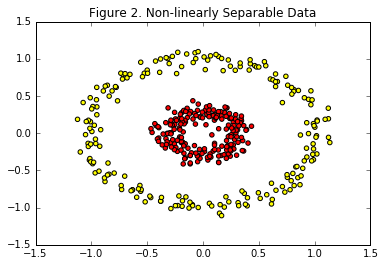

In [74]:
#Import some more libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
import numpy as np

#Look at an example of non-linearly separable data
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=400, noise=0.07, factor=0.3)
class_colors=['red' if yi == 1 else 'yellow' for yi in y]
plt.scatter(X[:,0],X[:,1],c=class_colors)
plt.title('Figure 2. Non-linearly Separable Data')

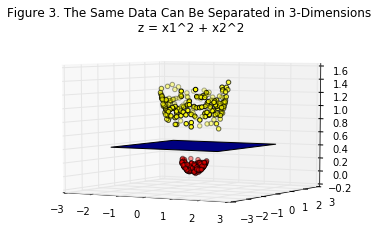

In [94]:
# Transform to a higher dimensional space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x2 = X[:,0]**2 + X[:,1]**2
ax.scatter(X[:,0], X[:,1], x2, zdir='z', s=20, depthshade=True, c=class_colors)
plt.title('Figure 3. The Same Data Can Be Separated in 3-Dimensions\n z = x1^2 + x2^2')

# Add a separating plane/surface
xx, yy = np.meshgrid([-2,-1,0,1,2], [-2,-1,0,1,2])
z = [0.43 for xi in xx]
ax.plot_surface(xx, yy, z)
ax.view_init(elev=5)
plt.show()

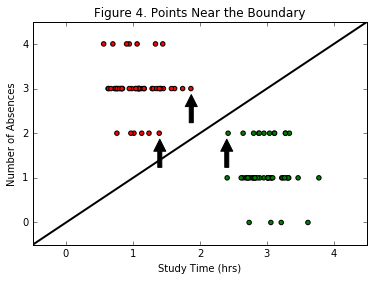

In [61]:
#Generate Example Data
rd.seed(1101)
x1 = []
x2 = []
y  = []
for i in range(0,100):
    y.append(rd.randint(0,1))
    x1.append(rd.gauss(y[i]*2+1,0.3))
    x2.append(round(rd.gauss(3-2*y[i],0.5)))
class_colors=['green' if yi == 1 else 'red' for yi in y]

#Plot Data
plt.scatter(x1,x2,c=class_colors)
plt.axis([-.5, 4.5, -.5, 4.5]) 
plt.plot([-1, 5], [-1,5], 'k-', lw=2)
plt.xlabel('Study Time (hrs)')
plt.ylabel('Number of Absences')
plt.title('Figure 4. Points Near the Boundary')
plt.annotate('', xy=(1.4, 1.9), xytext=(1.4,1.2),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('', xy=(2.4, 1.9), xytext=(2.4,1.2),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('', xy=(1.87, 2.9), xytext=(1.87,2.2),
            arrowprops=dict(facecolor='black', shrink=0.05))

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [87]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# Create the parameters list you wish to tune
parameters = {'C':[10**z for z in range(-3,4)],
             'kernel':['poly', 'rbf', 'sigmoid'],
             'degree':[1,2,3]}

# Initialize the classifier
clf = SVC()

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator and score
clf = grid_obj.best_estimator_
print 'The best classier found:\n', clf, '\n'
print "Cross-validation F1 score of the 'best' estimator was {:.4f}.".format(grid_obj.best_score_), '\n'

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

The best classier found:
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

Cross-validation F1 score of the 'best' estimator was 0.8189. 

Made predictions in 0.0030 seconds.
Tuned model has a training F1 score of 0.8375.
Made predictions in 0.0011 seconds.
Tuned model has a testing F1 score of 0.8194.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

The final F<sub>1</sub> score for the testing set is 0.8194, whereas it was 0.8000 for the untuned model. That is, the tuned model performed slightly better than the untuned model in the test set. In the training set, the tuned model had a lower F<sub>1</sub> score, 0.8375, relative to the untuned model which had a score fo 0.8655. This likely indicates that the tuning process reduced the SVMs tendency to overfit to the training data. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.